<a href="https://colab.research.google.com/github/kwangwonland/kfq_ML_2023/blob/main/0626_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
iris=load_iris()
columns=iris.feature_names
df=pd.DataFrame(iris.data,columns=columns)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


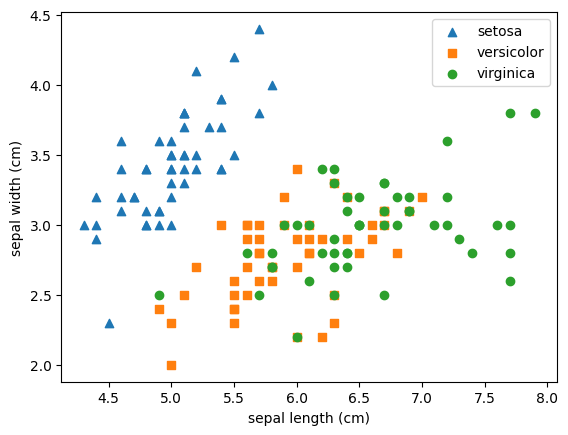

In [18]:
markers=['^','s','o']
tns=iris.target_names
for i,marker in enumerate(markers):
    f_i=df['target']==i
    df_i=df[f_i]
    x_data=df_i[columns[0]]
    y_data=df_i[columns[1]]
    plt.scatter(x_data,y_data,marker=marker,label=tns[i])
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.legend()
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss=StandardScaler()
scaled_data=ss.fit_transform(df.drop('target',axis=1))

In [25]:
from sklearn.decomposition import PCA

In [43]:
pca=PCA(n_components=2)
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)
print(scaled_data.shape,'->',pca_data.shape)

(150, 4) -> (150, 2)


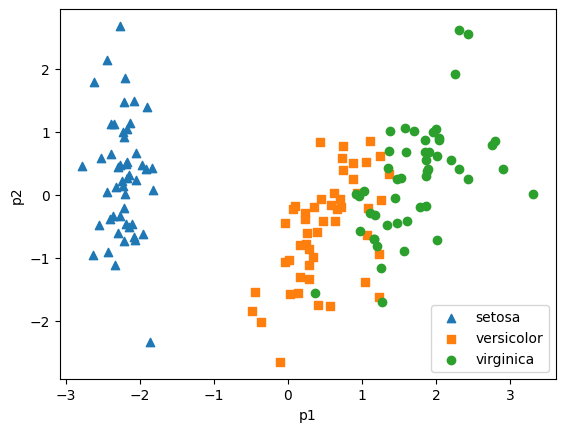

In [44]:
df2=pd.DataFrame(pca_data,columns=['p1','p2'])
markers=['^','s','o']
tns=iris.target_names
for i,marker in enumerate(markers):
    f_i=df['target']==i
    df_i=df2[f_i]
    x_data=df_i['p1']
    y_data=df_i['p2']
    plt.scatter(x_data,y_data,marker=marker,label=tns[i])
plt.xlabel('p1')
plt.ylabel('p2')
plt.legend()
plt.show()

In [46]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [52]:
rfc=RandomForestClassifier()
s=cross_val_score(rfc,iris.data,iris.target,scoring='accuracy',cv=5)
print('정확도;',s)
print('평균:',s.mean())

정확도; [0.96666667 0.96666667 0.93333333 0.9        1.        ]
평균: 0.9533333333333334


In [53]:
rfc=RandomForestClassifier()
s=cross_val_score(rfc,pca_data,iris.target,scoring='accuracy',cv=5)
print('정확도;',s)
print('평균:',s.mean())

정확도; [0.83333333 0.93333333 0.83333333 0.9        1.        ]
평균: 0.9


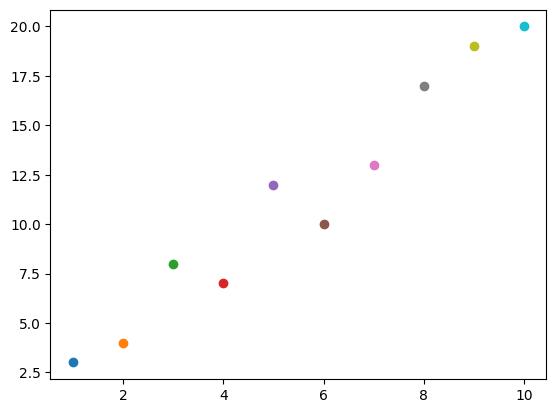

In [34]:
x=[1,2,3,4,5,6,7,8,9,10]
y=[3,4,8,7,12,10,13,17,19,20]
for i in range(len(x)):
    plt.scatter(x[i],y[i])
plt.show()

In [47]:
sample=pd.DataFrame()
sample['x']=x
sample['y']=y
pca=PCA(n_components=1)
pca_sam=pca.fit_transform(sample)
pca_sam

array([[-9.43544546],
       [-8.0948589 ],
       [-4.0678466 ],
       [-4.51821053],
       [ 0.40427701],
       [-0.94156216],
       [ 2.18997489],
       [ 6.21698719],
       [ 8.453049  ],
       [ 9.79363556]])

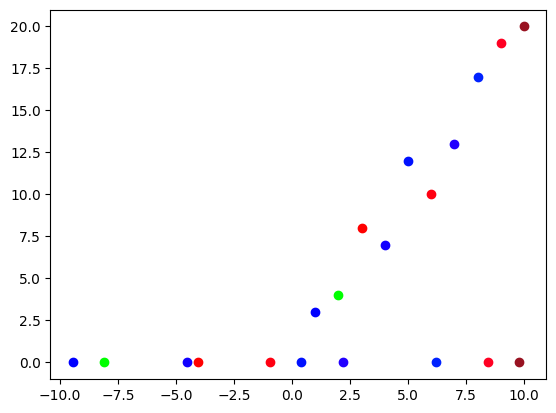

In [40]:
colors=['#0000ff','#00ff00','#ff0000',
        '#1100ff','#0011ff','#ff0011',
        '#2200ff','#0022ff','#ff0022',
        '#981221']
for i in range(len(x)):
    plt.scatter(x[i],y[i],color=colors[i])
    plt.scatter(pca_sam[i],0,color=colors[i])
plt.show()

In [48]:
pca.explained_variance_

array([44.82024534])

In [55]:
path='/content/drive/MyDrive/python_basic/data/creadit_card_clients.csv'

In [66]:
df=pd.read_csv(path)
print(df.shape)
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [68]:
df=df.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'default'})
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [69]:
data=df.drop('default',axis=1)
label=df['default']

In [ ]:
corr=data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,fmt='.1g')

In [72]:
pca=PCA(n_components=8)
pca_data=pca.fit_transform(data)
print(sum(pca.explained_variance_ratio_))
print(data.shape,'->',pca_data.shape)

0.984019630813164
(30000, 24) -> (30000, 8)


In [75]:
import time

In [76]:
rfc=RandomForestClassifier()
st=time.time()
s=cross_val_score(rfc,data,label,scoring='accuracy',cv=5)
et=time.time()
print('소요시간:', et-st)
print('정확도;',s)
print('평균:',s.mean())

소요시간: 49.74063754081726
정확도; [0.8065     0.80716667 0.81983333 0.83183333 0.81483333]
평균: 0.8160333333333334


In [77]:
rfc=RandomForestClassifier()
st=time.time()
s=cross_val_score(rfc,pca_data,label,scoring='accuracy',cv=5)
et=time.time()
print('소요시간:', et-st)
print('정확도;',s)
print('평균:',s.mean())

소요시간: 40.78934931755066
정확도; [0.77666667 0.77983333 0.77966667 0.78716667 0.78283333]
평균: 0.7812333333333334


In [78]:
ss=StandardScaler()
sd=ss.fit_transform(data)
pca=PCA(n_components=8)
pca_data2=pca.fit_transform(sd)

rfc=RandomForestClassifier()
st=time.time()
s=cross_val_score(rfc,pca_data2,label,scoring='accuracy',cv=5)
et=time.time()
print('소요시간:', et-st)
print('정확도;',s)
print('평균:',s.mean())

소요시간: 45.895034074783325
정확도; [0.78666667 0.793      0.799      0.80716667 0.795     ]
평균: 0.7961666666666667


In [79]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
mm=MinMaxScaler()
sd=mm.fit_transform(data)
pca=PCA(n_components=8)
pca_data2=pca.fit_transform(sd)

rfc=RandomForestClassifier()
st=time.time()
s=cross_val_score(rfc,pca_data2,label,scoring='accuracy',cv=5)
et=time.time()
print('소요시간:', et-st)
print('정확도;',s)
print('평균:',s.mean())

소요시간: 45.467307567596436
정확도; [0.7875     0.79883333 0.79883333 0.81433333 0.78333333]
평균: 0.7965666666666666
